# Data Science Salary Comparision in Two Different Regions

## 1. Introduction

**1.1 Background Information**

Data science is undoubtedly one of the most lucrative career options. However, it's crucial to recognize that salary can vary significantly based on factors like location and company (Situ et al., 2017). Therefore, it's essential to weigh all aspects when choosing job offers (Robinson et al., 2020). Hence, analyzing the difference in salary between different regions could provide employees insights to choose a place to start their journey in data science. 

**1.2 Research Question**

* Is there a difference of the salary of jobs that related to data science in Europe and North America?

More specifically, we focus on the disparity in data science job salaries between two different regions, Europe and North America. Our response variable is the salary, and we will use **difference in mean** salary and **standard deviation** of the salary to evaluate the question. 

**1.3 The Dataset**

Our dataset was found from Kaggle, which is a sample with information regarding the data science jobs’ salaries in different locations during the 2020-2022 (Bhatia, 2022). 

Below are variables related to our study:

1. `company_location` - Country where employer work.
2. `location` - Regions where employees work (created by us, either Europa or North America)
3. `salary_in_usd` - Salary in USD


## 2. Preliminary Results

**2.1 Data Cleaning**

In [16]:
# load necessary packages
library(infer)
library(tidyverse)
library(cowplot)

In [17]:
# load raw data
raw_salary <- read.csv("https://raw.githubusercontent.com/YuluDuan/Hypothesis-Testing-Data-Science-salary-comparison-in-different-location/main/ds_salaries.csv")

head(raw_salary)

,X,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
2,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
3,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
4,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
5,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
6,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


In the following, we generate the necessary columns and get the final dataset.

In [18]:
# by checking all the countries in this list, first find out the countries that belongs to Europe and North America.

na <- c("US", "MX","CA")
eur <- c("DE", "GB", "HU", "FR", "GR", "NL", "AT", "ES", "PT", "DK", "IT", "HR", "LU"
         ,"PL", "RO", "BE", "UA", "RU", "MT", "MD", "SI", "CH", "CZ", "EE", "IE")

In [19]:
# fliter out all rows belong to Europe and North America, save them to a new column called "location"

ds_salary <- raw_salary %>%
    filter(company_location %in% append(na, eur)) %>%
    mutate(location = "North America")

ds_salary$location[ds_salary$company_location %in% eur] <- "Europe"

ds_salary$location <- as.factor(ds_salary$location)

In [20]:
# create the final data set for this project by selecting columns that we would be useful.
ds_final <- ds_salary %>%
    select(salary_in_usd, location)
head(ds_final) # overview of the data

,salary_in_usd,location
,<int>,<fct>
1,79833,Europe
2,109024,Europe
3,150000,North America
4,72000,North America
5,190000,North America
6,35735,Europe


**2.2 Data Summary and Visualization**

* Table 1. Summary of the wages in two different locations

In [21]:
# create the summary of the data by setting a table with information about salary
ds_eur <- ds_final %>%
    filter(location == "Europe")
ds_na <- ds_final %>%
    filter(location == "North America") # create two datasets, one for each region

summary_eur <- summary(ds_eur$salary_in_usd)
summary_na <- summary(ds_na$salary_in_usd)

location <- c("Europe", "North America")
mini <- c(summary_eur[1], summary_na[1])
quan_1 <- c(summary_eur[2], summary_na[2])
median <- c(summary_eur[3], summary_na[3])
mean <- c(summary_eur[4], summary_na[4])
quan_3 <- c(summary_eur[5], summary_na[5])
max <- c(summary_eur[6], summary_na[6])
sample_size <- summary(ds_final$location)
sd <- c(sd(ds_eur$salary_in_usd), sd(ds_na$salary_in_usd)) #calculate different kinds of sample summary
table1 <- data.frame(minimum_wage = mini, first_quantile = quan_1, 
                     median_wage = median, mean_wage = mean, third_quantile = quan_3, maximum_wage = max, standard_deviation = sd,sample_size)
table1

,minimum_wage,first_quantile,median_wage,mean_wage,third_quantile,maximum_wage,standard_deviation,sample_size
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Europe,5882,46597.0,63831,69358.37,87932,230000,35261.06,157
North America,2859,99037.5,130400,139769.85,170000,600000,69754.52,388


For Europe, the sample mean salary ($\bar{x}_{eur}$) is 69358.37; while for North America, the sample mean salary ($\bar{x}_{na}$) is 139769.85. \
Our **test statistic**, i.e. difference in sample mean ($\bar{x}_{na} - \bar{x}_{eur}$), is 70411.48.

* Figure 1. Histograms of Salary in Europe and North America

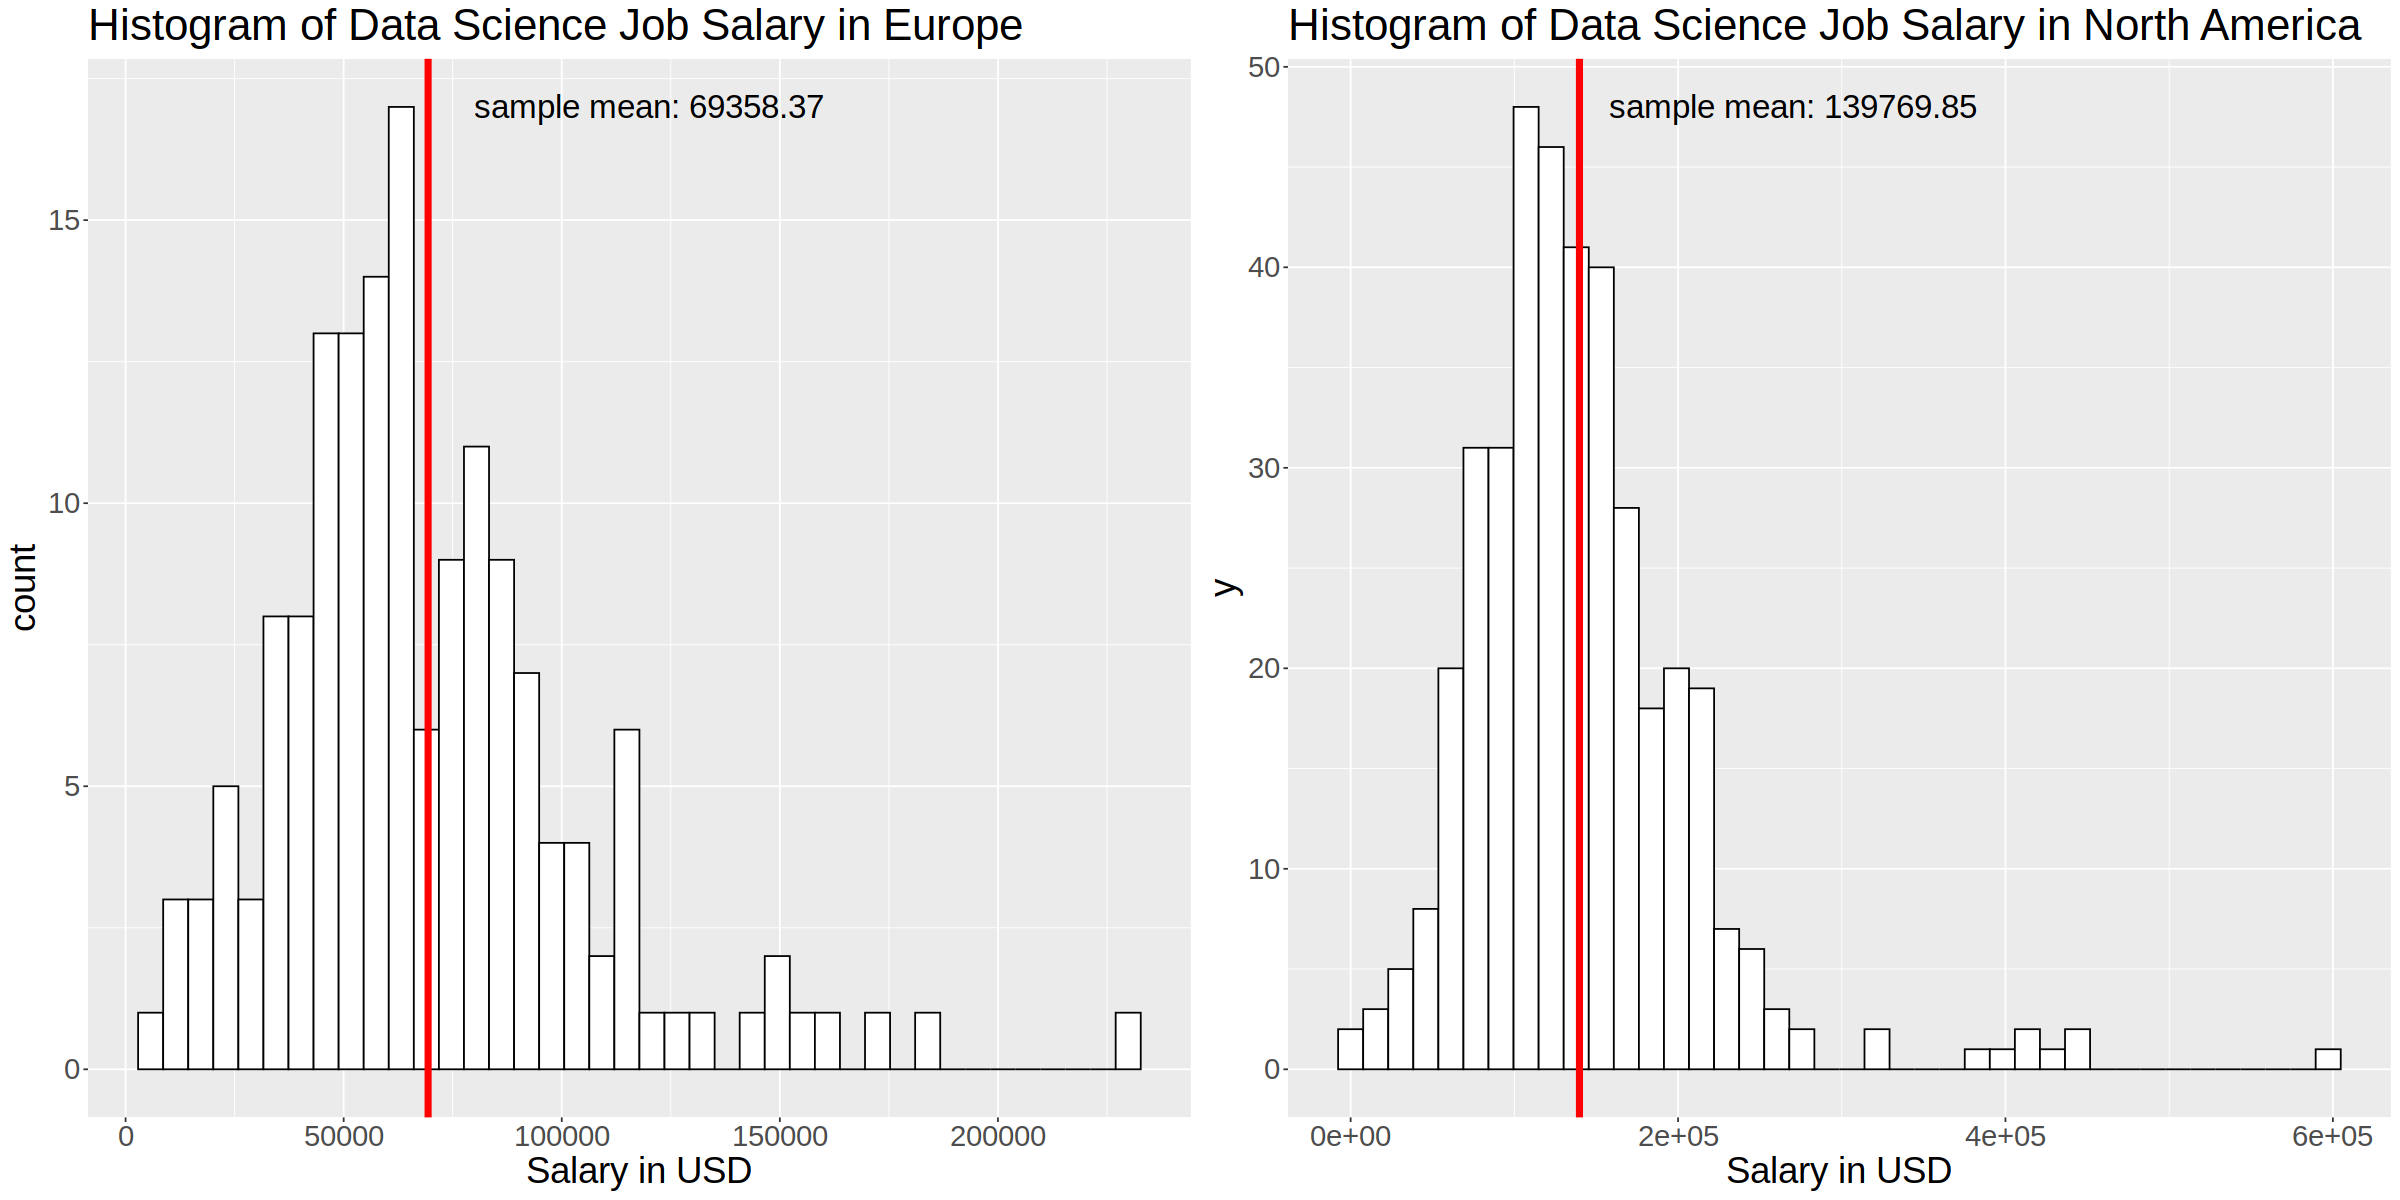

In [28]:
## create the two distributions

options(repr.plot.width= 20, repr.plot.height=10) #control the graph size
histogram_europe <- ds_final %>% 
    filter(location == "Europe") %>%
    ggplot(aes(x = salary_in_usd)) +
    geom_histogram(color="black", fill="white", bins = 40) +
    theme(text = element_text(size = 22)) +
    xlab("Salary in USD") + 
    ylab("count")+
    ggtitle("Histogram of Data Science Job Salary in Europe") + 
    geom_vline(xintercept = table1$mean_wage[1], color = "red", size = 2) + #add the line of sample mean
    annotate("text", x = 120000, y = 17, label = "sample mean: 69358.37", size = 7) 

histogram_na <- ds_final %>%
    filter(location == "North America") %>%
    ggplot(aes(x = salary_in_usd),color = 'white') +
    geom_histogram(color="black", fill="white",bins = 40) +
    theme(text = element_text(size = 22)) + 
    xlab("Salary in USD") + 
    ggtitle("Histogram of Data Science Job Salary in North America") +
    geom_vline(xintercept = table1$mean_wage[2], color = "red", size = 2) + #add the line of sample mean
    annotate("text", x = 270000, y = 48, label = "sample mean: 139769.85", size = 7) 

plot_grid(histogram_europe, histogram_na, labels = c('', ''))

Now, we would provide side-by-side boxplot to look at the spread of salaries for each region.

* Figure 2: Boxplot of the salaries in two different regions

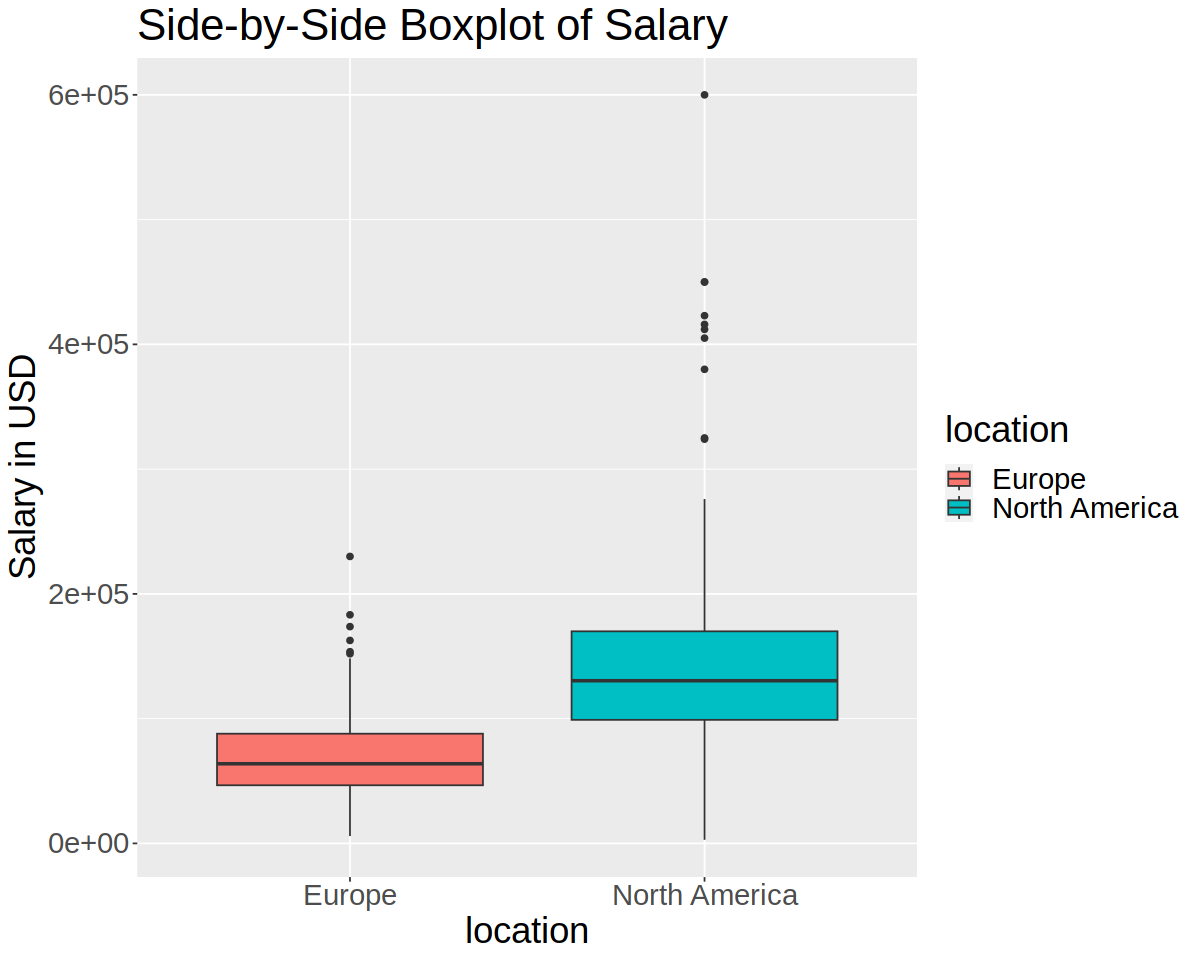

In [26]:
options(repr.plot.width=10, repr.plot.height=8)
boxplot_ds <- ggplot(ds_final, aes(x = location, y = salary_in_usd, fill = location)) +
    geom_boxplot() +
    theme(text = element_text(size = 22)) +
    ylab("Salary in USD") +
    ggtitle("Side-by-Side Boxplot of Salary")
    
boxplot_ds

## 3. Methods: Plan

**3.1 Potential Strength**

Our sample would be useful in learning about the current data science job markets since it comes from real data in recent years. Also, our sample sizes are fairly large, providing a higher chance for it to be representative. 

**3.2 Method**

As it would be insufficient to solely look at the plots and estimates because of the sampling variability associated, we would connect the two sample means with their standard deviations to provide **95%** confidence interval for the test statistic of difference in sample means to quantify the errors of the estimate. 

Also, we would perform hypothesis testing with $\alpha$ = 0.05 for: \
**Null Hypothesis (H0)**: there is no difference in the true mean salary between data science jobs in North American and Europe. \
**Alternative Hypothesis (Ha)**: there is a difference in the true mean salary between these two regions.


We use Bootstrap\Simulation and Asymptotic Method. For bootstrap\simulation, we will build bootstrap distribution for confidence interval and use permutation for null model in hypothesis testing. For asymptotic method, we will check assumptions and perform confidence interval and two-sample t-test based on CLT. Finally, We compare the results of these methods.


**3.3 Expectation**

Based on Figure 2, we expect the hypothesis testing to indicate the mean salary difference between the two regions. Bootstrap and asymptotic methods should yield similar results due to large sample sizes and minimal deviation from Normal in the histograms. This project will guide new graduates in selecting their work location. Further analysis could explore how other factors impact salaries in data science.


## 4. References

Bhatia, R. (2022). Data Science Job Salaries. Kaggle. https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

Robinson, E., Nolis, J., & O'Reilly for Higher Education. (2020). Build a career in data science. Manning Publications Co.

Situ, W., Zheng, L., Yu, X., & Daneshmand, M. (2017). Predicting the probability and salary to get data science job in top companies. IIE Annual Conference. Proceedings, 933-939.
